In [1]:
# Display plots inline and change default figure size
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.colors import LinearSegmentedColormap
from matplotlib.lines import Line2D 

import psycopg2
import pandas.io.sql as sqlio
from datetime import datetime
import getpass

In [2]:
host = 'r5-lx-l2.zai'
database = "booking"
username = 'feng.zhao'
pwd = getpass.getpass()

def get_dataframe(query):
    conn = psycopg2.connect("host='%s' dbname='%s' user='%s' password='%s'" % (host, database, username, pwd))
    df = sqlio.read_frame(query, conn)
    conn.close()
    
    return df

········


In [3]:
table = 'public.date_time_daily_stats'

daily_stats = get_dataframe(
    '''select * from %s''' % table)

daily_stats.index = pd.to_datetime(daily_stats.year*10000 + daily_stats.month*100 + daily_stats.day, format='%Y%m%d')

/Users/zhaofeng/.virtualenvs/env_expedia/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: read_frame is deprecated, use read_sql


 # Overall Summary

In [4]:
daily_stats[['count_click', 'count_booking_train', 'count_booking_test']].sum()/1000

count_click            34668.635
count_booking_train     3000.689
count_booking_test      2528.243
dtype: float64

In [5]:
print 'booking ratio for train set: ', daily_stats.count_booking_train.sum() * 1.0   \
/ (daily_stats.count_click.sum() + daily_stats.count_booking_train.sum())

booking ratio for train set:  0.0796586899197


In [6]:
print 'daily booking in train set: ', daily_stats.count_booking_train.sum() * 1.0 \
/ len(daily_stats[daily_stats.count_booking_train != 0])

daily booking in train set:  4144.5980663


In [51]:
print 'daily click in train set: ', daily_stats.count_click.sum() * 1.0 \
/ len(daily_stats[daily_stats.count_click != 0])

daily click in train set:  47884.8549724


In [7]:
print 'daily booking in test set: ', daily_stats.count_booking_test.sum() * 1.0 \
/ len(daily_stats[daily_stats.count_booking_test != 0])

daily booking in test set:  7062.13128492


# Monthly stats

In [67]:
monthly_number_stats_booking_train = (daily_stats.groupby(("year", "month"))["count_booking_train"].sum()/1000)
monthly_number_stats_click_train = (daily_stats.groupby(("year", "month"))["count_click"].sum()/1000)
monthly_number_stats_booking_test = (daily_stats.groupby(("year", "month"))["count_booking_test"].sum()/1000)

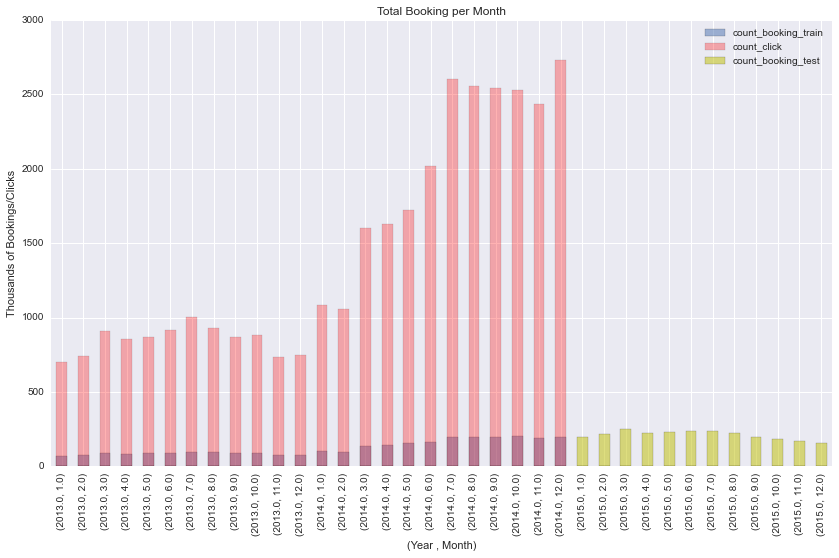

In [39]:
fig = monthly_number_stats_booking_train.plot(kind='bar', alpha=0.5, figsize=(14, 8))
monthly_number_stats_click_train.plot(kind='bar', alpha=0.3, color = 'r', figsize=(14, 8))
monthly_number_stats_booking_test.plot(kind='bar', alpha=0.5, color = 'y', figsize=(14, 8))

fig.legend()
fig.set_title("Total Booking per Month")
fig.set_ylabel("Thousands of Bookings/Clicks")
fig.set_xlabel("(Year , Month)" )

# Daily stats -- weekdays

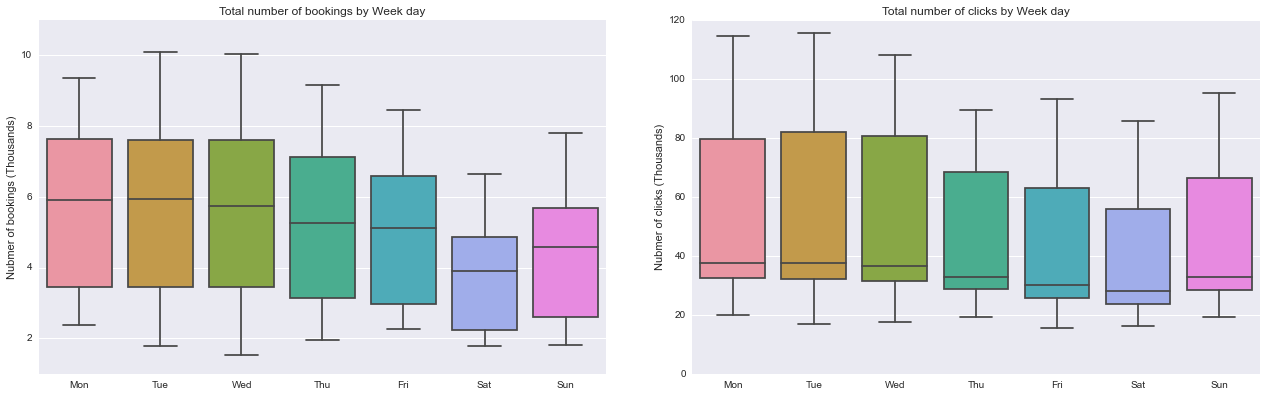

In [64]:
import locale, calendar

locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.tight_layout()
fig.set_size_inches(18.5,5.5)

dow = map(lambda x: calendar.day_abbr[x].capitalize(), daily_stats.index.dayofweek)
dow_order = map(lambda x: calendar.day_abbr[x].capitalize(), np.arange(0,7))

sns.boxplot(daily_stats.count_booking/1000, groupby=dow, order=dow_order, ax=axes[0])
axes[0].set_title("Total number of bookings by Week day")
axes[0].set_ylabel("Nubmer of bookings (Thousands)")

dow_clicks = map(lambda x: calendar.day_abbr[x].capitalize(), daily_stats[daily_stats.count_click!=0].index.dayofweek)
dow_clicks_order = map(lambda x: calendar.day_abbr[x].capitalize(), np.arange(0,7))

sns.boxplot(daily_stats[daily_stats.count_click!=0].count_click/1000., groupby=dow_clicks, order=dow_clicks_order, ax=axes[1])
axes[1].set_title("Total number of clicks by Week day")
axes[1].set_ylabel("Nubmer of clicks (Thousands)")

There are weekly pattern in booking time, high from Monday to Fri, low in the Friday and weekend.

# Monthly stats (Checkin and Checkout)

In [88]:
table = 'public.srch_ci_daily_stats'

daily_stats_ci = get_dataframe(
    '''select * from %s where year between 2013 and 2016''' % table
         )

daily_stats_ci.index = pd.to_datetime(daily_stats_ci.year*10000 + daily_stats_ci.month*100 + daily_stats_ci.day, format='%Y%m%d')

table = 'public.srch_co_daily_stats'

daily_stats_co = get_dataframe(
    '''select * from %s where year between 2013 and 2016''' % table
         )

daily_stats_co.index = pd.to_datetime(daily_stats_co.year*10000 + daily_stats_co.month*100 + daily_stats_co.day, format='%Y%m%d')

/Users/zhaofeng/.virtualenvs/env_expedia/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: read_frame is deprecated, use read_sql


In [89]:
monthly_number_stats_ci_booking_train = (daily_stats_ci.groupby(("year", "month"))["count_booking_train"].sum()/1000)
monthly_number_stats_ci_click_train = (daily_stats_ci.groupby(("year", "month"))["count_click"].sum()/1000)
monthly_number_stats_ci_booking_test = (daily_stats_ci.groupby(("year", "month"))["count_booking_test"].sum()/1000)

monthly_number_stats_co_booking_train = (daily_stats_co.groupby(("year", "month"))["count_booking_train"].sum()/1000)
monthly_number_stats_co_click_train = (daily_stats_co.groupby(("year", "month"))["count_click"].sum()/1000)
monthly_number_stats_co_booking_test = (daily_stats_co.groupby(("year", "month"))["count_booking_test"].sum()/1000)

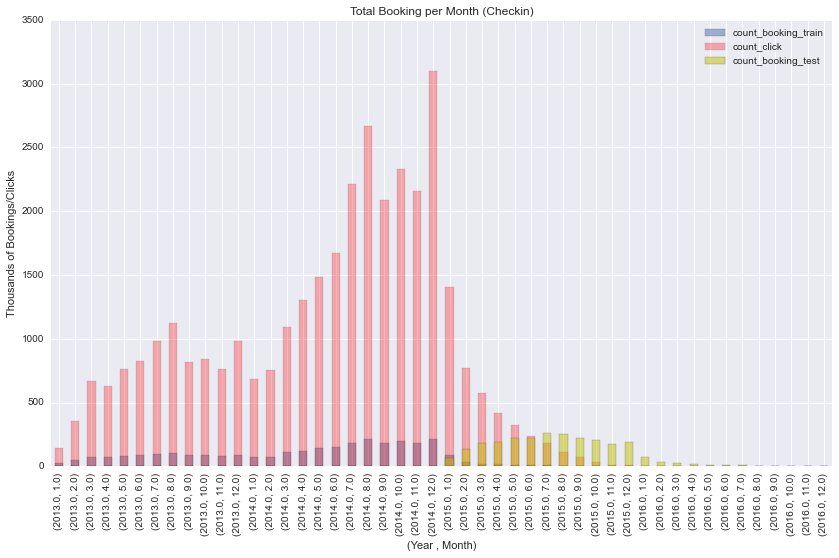

In [94]:
fig = monthly_number_stats_ci_booking_train.plot(kind='bar', alpha=0.5, figsize=(14, 8))
monthly_number_stats_ci_click_train.plot(kind='bar', alpha=0.3, color = 'r', figsize=(14, 8))
monthly_number_stats_ci_booking_test.plot(kind='bar', alpha=0.5, color = 'y', figsize=(14, 8))

fig.legend()
fig.set_title("Total Booking per Month (Checkin)")
fig.set_ylabel("Thousands of Bookings/Clicks")
fig.set_xlabel("(Year , Month)" )

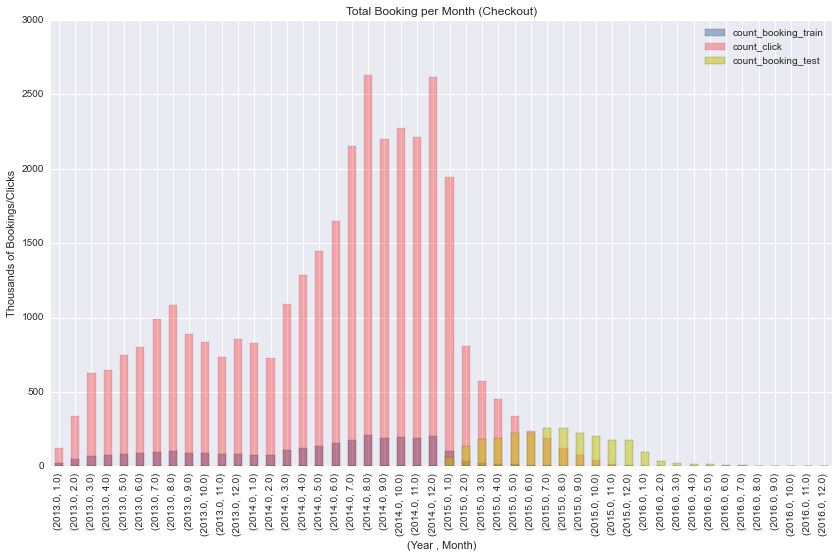

In [95]:
fig = monthly_number_stats_co_booking_train.plot(kind='bar', alpha=0.5, figsize=(14, 8))
monthly_number_stats_co_click_train.plot(kind='bar', alpha=0.3, color = 'r', figsize=(14, 8))
monthly_number_stats_co_booking_test.plot(kind='bar', alpha=0.5, color = 'y', figsize=(14, 8))

fig.legend()
fig.set_title("Total Booking per Month (Checkout)")
fig.set_ylabel("Thousands of Bookings/Clicks")
fig.set_xlabel("(Year , Month)" )

# Daily stats -- weekdays (Checkin and Checkout)

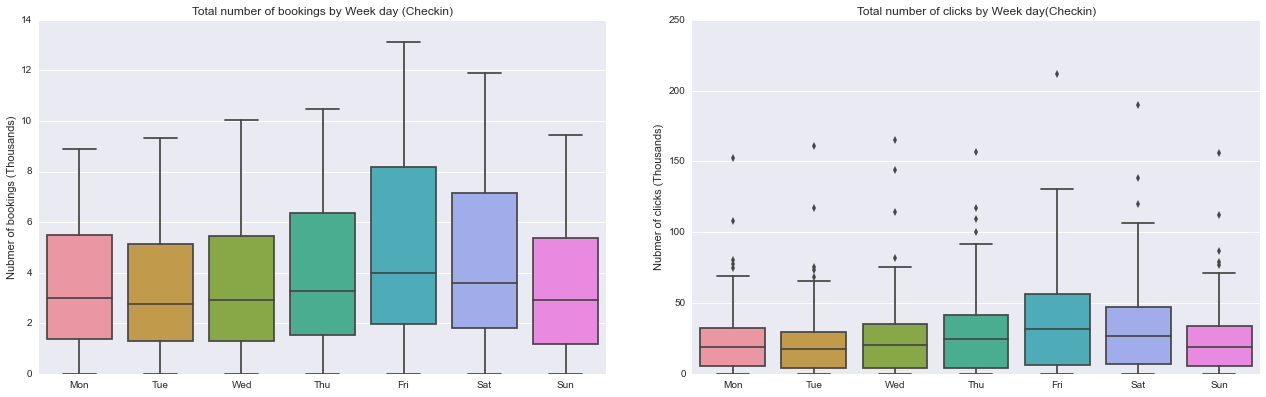

In [96]:
import locale, calendar

locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.tight_layout()
fig.set_size_inches(18.5,5.5)

dow = map(lambda x: calendar.day_abbr[x].capitalize(), daily_stats_ci.index.dayofweek)
dow_order = map(lambda x: calendar.day_abbr[x].capitalize(), np.arange(0,7))

sns.boxplot(daily_stats_ci.count_booking/1000, groupby=dow, order=dow_order, ax=axes[0])
axes[0].set_title("Total number of bookings by Week day (Checkin)")
axes[0].set_ylabel("Nubmer of bookings (Thousands)")

dow_clicks = map(lambda x: calendar.day_abbr[x].capitalize(), daily_stats_ci[daily_stats_ci.count_click!=0].index.dayofweek)
dow_clicks_order = map(lambda x: calendar.day_abbr[x].capitalize(), np.arange(0,7))

sns.boxplot(daily_stats_ci[daily_stats_ci.count_click!=0].count_click/1000., groupby=dow_clicks, order=dow_clicks_order, ax=axes[1])
axes[1].set_title("Total number of clicks by Week day(Checkin)")
axes[1].set_ylabel("Nubmer of clicks (Thousands)")

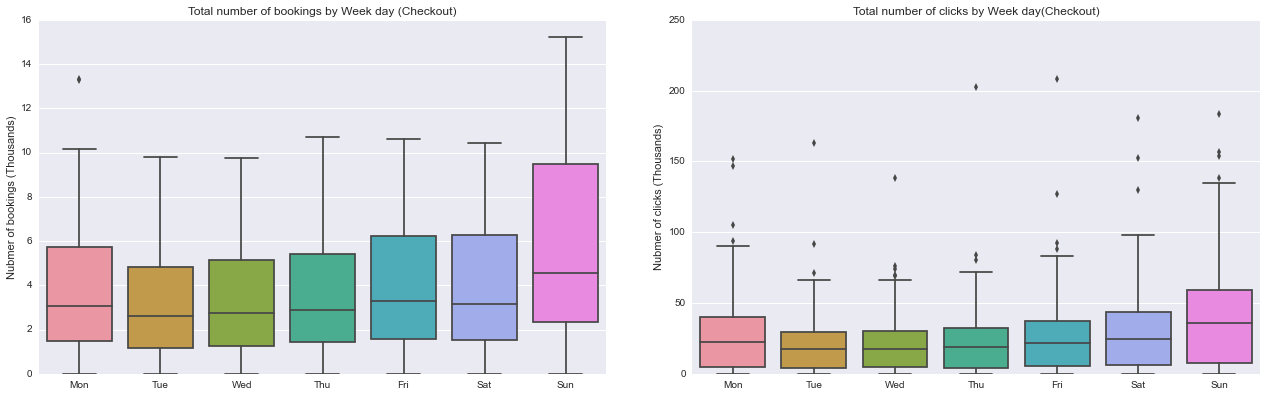

In [97]:
import locale, calendar

locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.tight_layout()
fig.set_size_inches(18.5,5.5)

dow = map(lambda x: calendar.day_abbr[x].capitalize(), daily_stats_co.index.dayofweek)
dow_order = map(lambda x: calendar.day_abbr[x].capitalize(), np.arange(0,7))

sns.boxplot(daily_stats_co.count_booking/1000, groupby=dow, order=dow_order, ax=axes[0])
axes[0].set_title("Total number of bookings by Week day (Checkout)")
axes[0].set_ylabel("Nubmer of bookings (Thousands)")

dow_clicks = map(lambda x: calendar.day_abbr[x].capitalize(), daily_stats_co[daily_stats_co.count_click!=0].index.dayofweek)
dow_clicks_order = map(lambda x: calendar.day_abbr[x].capitalize(), np.arange(0,7))

sns.boxplot(daily_stats_co[daily_stats_co.count_click!=0].count_click/1000., groupby=dow_clicks, order=dow_clicks_order, ax=axes[1])
axes[1].set_title("Total number of clicks by Week day(Checkout)")
axes[1].set_ylabel("Nubmer of clicks (Thousands)")

There are weekly pattern in checkin and checkout, high checkin on Friday and highest checkout on Sunday.